# Analysis of Mutual Information Results

## Setup

In [1]:
from pathlib import Path
import os
wd=Path().absolute().parent
os.chdir(wd) #change the working dirctory to the parant

import matplotlib.pyplot as plt
from modules.func import *
import pickle

In [2]:
all_data_dir=Path('data/alldata/') # data directory
datalist=[x for x in all_data_dir.iterdir()] # get the list of files under the data directory
output_dir=Path("output/data/info_metrics/") # setup the output directory

## Visualization(`I_list`/`n_parts_range`)

mouse name:091317 OF CaMKII HKO M19-n1
mouse name:092217 OF CaMKII HKO M30-n1
mouse name:M45_042718_OF
mouse name:091317 OF CaMKII HKO M20-n1
mouse name:M46_042718_OF
mouse name:CK_KO_RN1_OF
mouse name:CK_WT_RN3_OF
mouse name:090817 OF CaMKII HKO M22-n1
mouse name:092217 OF CaMKII WT M29-n1
mouse name:M44_042718_OF
mouse name:092717 OF SERT WT M32-n1
mouse name:081117 OF B6J M27-n1


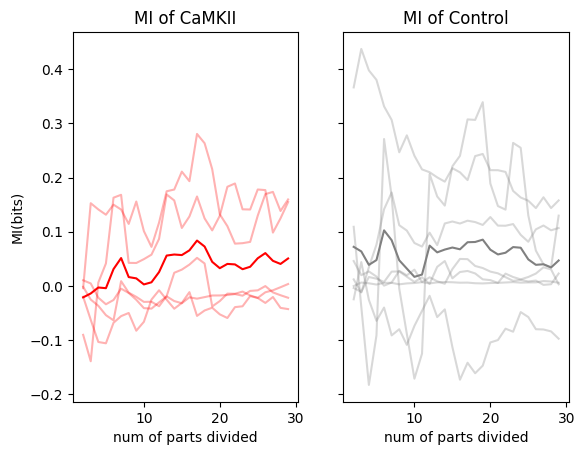

In [16]:
fig,axes=plt.subplots(ncols=2,sharey=True)

info_camkII_all_list=[]
info_control_all_list=[]
for data_dir in np.array(datalist):
    data_name=str(data_dir).split('/')[-1]
    print(f'mouse name:{data_name}')

    with open(output_dir/f"info_MI_nParts_{data_name}", "rb") as f:
        I_list,n_parts_range=pickle.load(f)
    n_parts_range=range(2,30)

    if "CaMKII" in data_name:
        info_camkII_all_list.append(I_list)
        axes[0].plot(n_parts_range,I_list,c="r",alpha=.3)
    else:
        info_control_all_list.append(I_list)
        axes[1].plot(n_parts_range,I_list,c="gray",alpha=.3)
axes[0].set_title("MI of CaMKII")
axes[0].set_xlabel("num of parts divided")
axes[0].set_ylabel("MI(bits)")
axes[1].set_title("MI of Control")
axes[1].set_xlabel("num of parts divided")


#----take average
info_camkII_avg=np.mean(info_camkII_all_list,axis=0)
info_control_avg=np.mean(info_control_all_list,axis=0)
axes[0].plot(n_parts_range,info_camkII_avg,c="r")
axes[1].plot(n_parts_range,info_control_avg,c="gray")

In [13]:
np.mean([[1,2],[3,4]],axis=0)

array([2., 3.])